# Aging clock in 30 lines

In [1]:
#!pip install pandas catboost scikit-learn seaborn matplotlib numpy

In [2]:
# to work with table data
import pandas as pd

# cool machine learning algorithm
from catboost import CatBoostRegressor

# 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Preprocess data

In [3]:
whole_train = pd.read_csv("train.csv")
whole_test = pd.read_csv("secret_test.csv")

In [4]:
def prepare_data(df):
    df = df.copy()

    # remove id, since it is not a meaningful feature
    df.drop("id", axis=1, inplace=True)

    df["sex"] = df["sex"].map({"M": 0, "F": 1})
    
    # Fill missing values with a large negative constant (it is a dumb strategy but anyway)
    df = df.fillna(-100)
    
    # Missing values imputation by Tanya
    df['hematocrit'] = df['hematocrit'].fillna( df['mean_cell_volume'] * df['red_blood_cell_num'] / 10)

    return df

whole_train = prepare_data(whole_train)
whole_test = prepare_data(whole_test)

In [5]:
# We split the whole train to our local train and test to emulate the situation, 
# when we don't have access to true labels -- like it is for the real test data.
# We will first train our model only on local train and then evaluate on local test 
# to get an idea, how good it will work on a real test.
train, test = train_test_split(whole_train, test_size=0.1, random_state=42)

X_train = train.drop(columns=["age"])
y_train = train["age"]

X_test = test.drop(columns=["age"])
y_test = test["age"]

### Train a model

In [6]:
model = CatBoostRegressor(cat_features=["sex"])

# you can try changing number of trees, depth and learning rate
# model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=4, n_cat_features=["sex"])

model.fit(X_train, y_train)

Learning rate set to 0.078255
0:	learn: 23.4079830	total: 75.3ms	remaining: 1m 15s
1:	learn: 22.7985785	total: 82.3ms	remaining: 41.1s
2:	learn: 22.2771388	total: 89.8ms	remaining: 29.8s
3:	learn: 21.7957318	total: 97.2ms	remaining: 24.2s
4:	learn: 21.3899929	total: 111ms	remaining: 22.2s
5:	learn: 20.9835095	total: 120ms	remaining: 19.9s
6:	learn: 20.6301607	total: 126ms	remaining: 17.9s
7:	learn: 20.3205932	total: 133ms	remaining: 16.4s
8:	learn: 20.0213132	total: 139ms	remaining: 15.3s
9:	learn: 19.7634436	total: 146ms	remaining: 14.4s
10:	learn: 19.5363763	total: 151ms	remaining: 13.6s
11:	learn: 19.3286568	total: 157ms	remaining: 13s
12:	learn: 19.1563722	total: 164ms	remaining: 12.4s
13:	learn: 18.9867176	total: 170ms	remaining: 12s
14:	learn: 18.8333143	total: 177ms	remaining: 11.6s
15:	learn: 18.7003251	total: 184ms	remaining: 11.3s
16:	learn: 18.5761626	total: 192ms	remaining: 11.1s
17:	learn: 18.4614538	total: 199ms	remaining: 10.9s
18:	learn: 18.3607350	total: 207ms	remainin

158:	learn: 16.5036933	total: 1.37s	remaining: 7.25s
159:	learn: 16.5002277	total: 1.38s	remaining: 7.24s
160:	learn: 16.4972419	total: 1.39s	remaining: 7.24s
161:	learn: 16.4912569	total: 1.4s	remaining: 7.24s
162:	learn: 16.4877880	total: 1.41s	remaining: 7.23s
163:	learn: 16.4848847	total: 1.42s	remaining: 7.22s
164:	learn: 16.4794910	total: 1.43s	remaining: 7.21s
165:	learn: 16.4755844	total: 1.43s	remaining: 7.2s
166:	learn: 16.4720862	total: 1.44s	remaining: 7.18s
167:	learn: 16.4684697	total: 1.45s	remaining: 7.17s
168:	learn: 16.4648389	total: 1.46s	remaining: 7.16s
169:	learn: 16.4618917	total: 1.46s	remaining: 7.15s
170:	learn: 16.4598636	total: 1.47s	remaining: 7.15s
171:	learn: 16.4565347	total: 1.49s	remaining: 7.15s
172:	learn: 16.4540240	total: 1.5s	remaining: 7.19s
173:	learn: 16.4506763	total: 1.51s	remaining: 7.19s
174:	learn: 16.4470009	total: 1.52s	remaining: 7.19s
175:	learn: 16.4430167	total: 1.54s	remaining: 7.19s
176:	learn: 16.4408997	total: 1.54s	remaining: 7.

321:	learn: 16.0934456	total: 2.76s	remaining: 5.8s
322:	learn: 16.0911563	total: 2.76s	remaining: 5.79s
323:	learn: 16.0908551	total: 2.77s	remaining: 5.79s
324:	learn: 16.0896231	total: 2.78s	remaining: 5.77s
325:	learn: 16.0895160	total: 2.79s	remaining: 5.76s
326:	learn: 16.0875564	total: 2.79s	remaining: 5.75s
327:	learn: 16.0860857	total: 2.8s	remaining: 5.74s
328:	learn: 16.0830253	total: 2.81s	remaining: 5.73s
329:	learn: 16.0812212	total: 2.82s	remaining: 5.72s
330:	learn: 16.0785345	total: 2.82s	remaining: 5.71s
331:	learn: 16.0761537	total: 2.83s	remaining: 5.7s
332:	learn: 16.0740097	total: 2.84s	remaining: 5.7s
333:	learn: 16.0717691	total: 2.85s	remaining: 5.69s
334:	learn: 16.0694320	total: 2.86s	remaining: 5.68s
335:	learn: 16.0678334	total: 2.87s	remaining: 5.67s
336:	learn: 16.0659441	total: 2.88s	remaining: 5.66s
337:	learn: 16.0642951	total: 2.88s	remaining: 5.64s
338:	learn: 16.0635973	total: 2.89s	remaining: 5.63s
339:	learn: 16.0618361	total: 2.9s	remaining: 5.62

481:	learn: 15.8465955	total: 4.15s	remaining: 4.46s
482:	learn: 15.8454381	total: 4.16s	remaining: 4.45s
483:	learn: 15.8444255	total: 4.16s	remaining: 4.44s
484:	learn: 15.8431714	total: 4.17s	remaining: 4.43s
485:	learn: 15.8418288	total: 4.18s	remaining: 4.42s
486:	learn: 15.8400299	total: 4.19s	remaining: 4.41s
487:	learn: 15.8390124	total: 4.2s	remaining: 4.4s
488:	learn: 15.8372736	total: 4.21s	remaining: 4.4s
489:	learn: 15.8357643	total: 4.22s	remaining: 4.39s
490:	learn: 15.8348021	total: 4.23s	remaining: 4.38s
491:	learn: 15.8327695	total: 4.24s	remaining: 4.38s
492:	learn: 15.8310897	total: 4.26s	remaining: 4.38s
493:	learn: 15.8299764	total: 4.26s	remaining: 4.37s
494:	learn: 15.8283634	total: 4.27s	remaining: 4.36s
495:	learn: 15.8271825	total: 4.29s	remaining: 4.36s
496:	learn: 15.8255505	total: 4.3s	remaining: 4.35s
497:	learn: 15.8246421	total: 4.3s	remaining: 4.34s
498:	learn: 15.8236034	total: 4.31s	remaining: 4.33s
499:	learn: 15.8219734	total: 4.32s	remaining: 4.32

647:	learn: 15.6271460	total: 5.75s	remaining: 3.12s
648:	learn: 15.6262164	total: 5.75s	remaining: 3.11s
649:	learn: 15.6250249	total: 5.76s	remaining: 3.1s
650:	learn: 15.6243239	total: 5.77s	remaining: 3.09s
651:	learn: 15.6224100	total: 5.78s	remaining: 3.08s
652:	learn: 15.6207671	total: 5.79s	remaining: 3.08s
653:	learn: 15.6193383	total: 5.79s	remaining: 3.07s
654:	learn: 15.6175242	total: 5.8s	remaining: 3.06s
655:	learn: 15.6160054	total: 5.81s	remaining: 3.04s
656:	learn: 15.6144201	total: 5.82s	remaining: 3.04s
657:	learn: 15.6133672	total: 5.82s	remaining: 3.03s
658:	learn: 15.6122330	total: 5.83s	remaining: 3.02s
659:	learn: 15.6112517	total: 5.84s	remaining: 3.01s
660:	learn: 15.6109575	total: 5.85s	remaining: 3s
661:	learn: 15.6099429	total: 5.85s	remaining: 2.99s
662:	learn: 15.6093738	total: 5.86s	remaining: 2.98s
663:	learn: 15.6087948	total: 5.87s	remaining: 2.97s
664:	learn: 15.6073547	total: 5.87s	remaining: 2.96s
665:	learn: 15.6060176	total: 5.88s	remaining: 2.95

824:	learn: 15.4276762	total: 7.32s	remaining: 1.55s
825:	learn: 15.4269828	total: 7.33s	remaining: 1.54s
826:	learn: 15.4260609	total: 7.34s	remaining: 1.53s
827:	learn: 15.4249556	total: 7.35s	remaining: 1.53s
828:	learn: 15.4239085	total: 7.36s	remaining: 1.52s
829:	learn: 15.4234471	total: 7.36s	remaining: 1.51s
830:	learn: 15.4222949	total: 7.37s	remaining: 1.5s
831:	learn: 15.4214175	total: 7.38s	remaining: 1.49s
832:	learn: 15.4203765	total: 7.39s	remaining: 1.48s
833:	learn: 15.4199098	total: 7.4s	remaining: 1.47s
834:	learn: 15.4180846	total: 7.41s	remaining: 1.46s
835:	learn: 15.4169627	total: 7.42s	remaining: 1.45s
836:	learn: 15.4152736	total: 7.42s	remaining: 1.45s
837:	learn: 15.4134829	total: 7.43s	remaining: 1.44s
838:	learn: 15.4124912	total: 7.43s	remaining: 1.43s
839:	learn: 15.4114325	total: 7.44s	remaining: 1.42s
840:	learn: 15.4106099	total: 7.45s	remaining: 1.41s
841:	learn: 15.4088151	total: 7.46s	remaining: 1.4s
842:	learn: 15.4081124	total: 7.46s	remaining: 1.

979:	learn: 15.2630175	total: 8.72s	remaining: 178ms
980:	learn: 15.2619893	total: 8.74s	remaining: 169ms
981:	learn: 15.2611019	total: 8.74s	remaining: 160ms
982:	learn: 15.2601258	total: 8.76s	remaining: 151ms
983:	learn: 15.2595310	total: 8.76s	remaining: 142ms
984:	learn: 15.2587899	total: 8.77s	remaining: 134ms
985:	learn: 15.2574248	total: 8.78s	remaining: 125ms
986:	learn: 15.2562618	total: 8.79s	remaining: 116ms
987:	learn: 15.2554707	total: 8.8s	remaining: 107ms
988:	learn: 15.2543603	total: 8.8s	remaining: 97.9ms
989:	learn: 15.2537144	total: 8.81s	remaining: 89ms
990:	learn: 15.2521796	total: 8.82s	remaining: 80.1ms
991:	learn: 15.2517286	total: 8.83s	remaining: 71.2ms
992:	learn: 15.2507205	total: 8.83s	remaining: 62.3ms
993:	learn: 15.2490082	total: 8.84s	remaining: 53.4ms
994:	learn: 15.2481000	total: 8.85s	remaining: 44.5ms
995:	learn: 15.2472339	total: 8.85s	remaining: 35.6ms
996:	learn: 15.2454803	total: 8.86s	remaining: 26.7ms
997:	learn: 15.2447659	total: 8.87s	remai

In [7]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [8]:
print(f"Mean absolute error on our train set: {mean_absolute_error(y_train, y_train_prediction):.2f}")
print(f"Mean absolute error on our test set: {mean_absolute_error(y_test, y_test_prediction):.2f}")

Mean absolute error on our train set: 11.83
Mean absolute error on our test set: 12.64


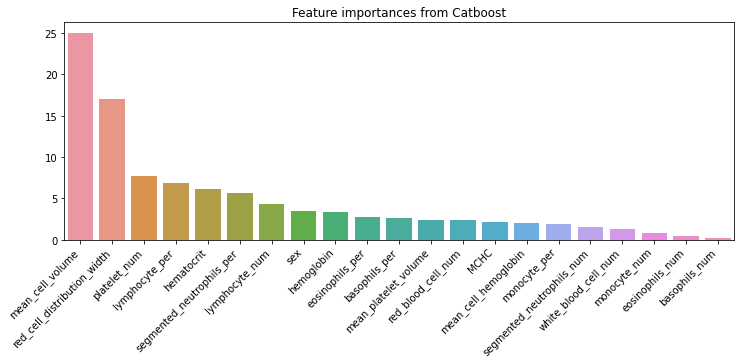

In [9]:
plt.figure(figsize=(12, 4))

indices = np.argsort(-model.feature_importances_)
feature_names = whole_train.drop(columns=["age"]).columns 

sns.barplot(
    x=[feature_names[i] for i in indices], 
    y=model.feature_importances_[indices]
)
plt.title("Feature importances from Catboost")
plt.xticks(rotation=45, ha="right")
plt.show()

### Retrain model on all available data and make a final prediction

In [10]:
full_X_train = whole_train.drop(columns=["age"])
full_y_train = whole_train["age"]

model.fit(full_X_train, full_y_train)

Learning rate set to 0.079569
0:	learn: 23.4062047	total: 30.1ms	remaining: 30.1s
1:	learn: 22.7959612	total: 41.1ms	remaining: 20.5s
2:	learn: 22.2415595	total: 54.1ms	remaining: 18s
3:	learn: 21.7429999	total: 65.8ms	remaining: 16.4s
4:	learn: 21.3102909	total: 81.5ms	remaining: 16.2s
5:	learn: 20.9189763	total: 92.8ms	remaining: 15.4s
6:	learn: 20.5665129	total: 104ms	remaining: 14.7s
7:	learn: 20.2675945	total: 122ms	remaining: 15.1s
8:	learn: 20.0078930	total: 137ms	remaining: 15.1s
9:	learn: 19.7585923	total: 165ms	remaining: 16.3s
10:	learn: 19.5187197	total: 179ms	remaining: 16.1s
11:	learn: 19.3111746	total: 194ms	remaining: 15.9s
12:	learn: 19.1199295	total: 206ms	remaining: 15.7s
13:	learn: 18.9518715	total: 219ms	remaining: 15.4s
14:	learn: 18.7941198	total: 233ms	remaining: 15.3s
15:	learn: 18.6665094	total: 249ms	remaining: 15.3s
16:	learn: 18.5498690	total: 261ms	remaining: 15.1s
17:	learn: 18.4315178	total: 274ms	remaining: 15s
18:	learn: 18.3207943	total: 289ms	remaini

160:	learn: 16.4703588	total: 2.21s	remaining: 11.5s
161:	learn: 16.4659776	total: 2.22s	remaining: 11.5s
162:	learn: 16.4625435	total: 2.23s	remaining: 11.5s
163:	learn: 16.4582931	total: 2.24s	remaining: 11.4s
164:	learn: 16.4552333	total: 2.25s	remaining: 11.4s
165:	learn: 16.4523054	total: 2.26s	remaining: 11.4s
166:	learn: 16.4481453	total: 2.27s	remaining: 11.3s
167:	learn: 16.4450883	total: 2.28s	remaining: 11.3s
168:	learn: 16.4419888	total: 2.29s	remaining: 11.3s
169:	learn: 16.4382763	total: 2.3s	remaining: 11.2s
170:	learn: 16.4331669	total: 2.3s	remaining: 11.2s
171:	learn: 16.4301934	total: 2.32s	remaining: 11.2s
172:	learn: 16.4271997	total: 2.33s	remaining: 11.1s
173:	learn: 16.4248105	total: 2.34s	remaining: 11.1s
174:	learn: 16.4225774	total: 2.35s	remaining: 11.1s
175:	learn: 16.4197679	total: 2.35s	remaining: 11s
176:	learn: 16.4173561	total: 2.36s	remaining: 11s
177:	learn: 16.4145137	total: 2.37s	remaining: 11s
178:	learn: 16.4119756	total: 2.38s	remaining: 10.9s
1

325:	learn: 16.0879675	total: 3.8s	remaining: 7.86s
326:	learn: 16.0866558	total: 3.81s	remaining: 7.85s
327:	learn: 16.0833809	total: 3.82s	remaining: 7.83s
328:	learn: 16.0818955	total: 3.84s	remaining: 7.84s
329:	learn: 16.0817932	total: 3.85s	remaining: 7.82s
330:	learn: 16.0806626	total: 3.86s	remaining: 7.81s
331:	learn: 16.0793797	total: 3.87s	remaining: 7.79s
332:	learn: 16.0775457	total: 3.88s	remaining: 7.78s
333:	learn: 16.0753061	total: 3.89s	remaining: 7.76s
334:	learn: 16.0736839	total: 3.9s	remaining: 7.74s
335:	learn: 16.0725239	total: 3.91s	remaining: 7.72s
336:	learn: 16.0724362	total: 3.91s	remaining: 7.7s
337:	learn: 16.0710895	total: 3.92s	remaining: 7.68s
338:	learn: 16.0686080	total: 3.93s	remaining: 7.66s
339:	learn: 16.0670587	total: 3.94s	remaining: 7.64s
340:	learn: 16.0642801	total: 3.94s	remaining: 7.62s
341:	learn: 16.0623662	total: 3.95s	remaining: 7.6s
342:	learn: 16.0602381	total: 3.96s	remaining: 7.58s
343:	learn: 16.0582057	total: 3.96s	remaining: 7.5

499:	learn: 15.8393732	total: 5.19s	remaining: 5.19s
500:	learn: 15.8380038	total: 5.2s	remaining: 5.18s
501:	learn: 15.8364656	total: 5.21s	remaining: 5.17s
502:	learn: 15.8348775	total: 5.22s	remaining: 5.16s
503:	learn: 15.8337319	total: 5.23s	remaining: 5.14s
504:	learn: 15.8324088	total: 5.24s	remaining: 5.13s
505:	learn: 15.8313890	total: 5.25s	remaining: 5.13s
506:	learn: 15.8295502	total: 5.26s	remaining: 5.11s
507:	learn: 15.8285404	total: 5.26s	remaining: 5.1s
508:	learn: 15.8281298	total: 5.27s	remaining: 5.08s
509:	learn: 15.8271092	total: 5.28s	remaining: 5.07s
510:	learn: 15.8249837	total: 5.29s	remaining: 5.06s
511:	learn: 15.8233360	total: 5.29s	remaining: 5.05s
512:	learn: 15.8223161	total: 5.3s	remaining: 5.03s
513:	learn: 15.8208161	total: 5.31s	remaining: 5.02s
514:	learn: 15.8189791	total: 5.32s	remaining: 5s
515:	learn: 15.8176564	total: 5.32s	remaining: 4.99s
516:	learn: 15.8160341	total: 5.33s	remaining: 4.98s
517:	learn: 15.8141169	total: 5.33s	remaining: 4.96s

671:	learn: 15.6291224	total: 6.58s	remaining: 3.21s
672:	learn: 15.6282894	total: 6.59s	remaining: 3.2s
673:	learn: 15.6268825	total: 6.61s	remaining: 3.19s
674:	learn: 15.6253522	total: 6.61s	remaining: 3.18s
675:	learn: 15.6246370	total: 6.62s	remaining: 3.17s
676:	learn: 15.6237104	total: 6.63s	remaining: 3.16s
677:	learn: 15.6220739	total: 6.64s	remaining: 3.15s
678:	learn: 15.6205816	total: 6.64s	remaining: 3.14s
679:	learn: 15.6191897	total: 6.65s	remaining: 3.13s
680:	learn: 15.6185226	total: 6.66s	remaining: 3.12s
681:	learn: 15.6176665	total: 6.67s	remaining: 3.11s
682:	learn: 15.6159156	total: 6.68s	remaining: 3.1s
683:	learn: 15.6150822	total: 6.69s	remaining: 3.09s
684:	learn: 15.6144651	total: 6.7s	remaining: 3.08s
685:	learn: 15.6131593	total: 6.71s	remaining: 3.07s
686:	learn: 15.6131226	total: 6.71s	remaining: 3.06s
687:	learn: 15.6125388	total: 6.72s	remaining: 3.05s
688:	learn: 15.6115387	total: 6.73s	remaining: 3.04s
689:	learn: 15.6101114	total: 6.74s	remaining: 3.

832:	learn: 15.4556110	total: 7.98s	remaining: 1.6s
833:	learn: 15.4547218	total: 7.98s	remaining: 1.59s
834:	learn: 15.4539353	total: 7.99s	remaining: 1.58s
835:	learn: 15.4532349	total: 8s	remaining: 1.57s
836:	learn: 15.4518299	total: 8.01s	remaining: 1.56s
837:	learn: 15.4505017	total: 8.01s	remaining: 1.55s
838:	learn: 15.4489443	total: 8.02s	remaining: 1.54s
839:	learn: 15.4478754	total: 8.03s	remaining: 1.53s
840:	learn: 15.4473570	total: 8.04s	remaining: 1.52s
841:	learn: 15.4464792	total: 8.04s	remaining: 1.51s
842:	learn: 15.4456396	total: 8.05s	remaining: 1.5s
843:	learn: 15.4446087	total: 8.06s	remaining: 1.49s
844:	learn: 15.4433962	total: 8.06s	remaining: 1.48s
845:	learn: 15.4422476	total: 8.07s	remaining: 1.47s
846:	learn: 15.4401008	total: 8.08s	remaining: 1.46s
847:	learn: 15.4388802	total: 8.09s	remaining: 1.45s
848:	learn: 15.4379491	total: 8.1s	remaining: 1.44s
849:	learn: 15.4375989	total: 8.1s	remaining: 1.43s
850:	learn: 15.4370660	total: 8.11s	remaining: 1.42s


988:	learn: 15.3031755	total: 9.35s	remaining: 104ms
989:	learn: 15.3024981	total: 9.35s	remaining: 94.5ms
990:	learn: 15.3014128	total: 9.36s	remaining: 85ms
991:	learn: 15.3000718	total: 9.38s	remaining: 75.6ms
992:	learn: 15.2995477	total: 9.38s	remaining: 66.2ms
993:	learn: 15.2987266	total: 9.39s	remaining: 56.7ms
994:	learn: 15.2981015	total: 9.4s	remaining: 47.2ms
995:	learn: 15.2970073	total: 9.41s	remaining: 37.8ms
996:	learn: 15.2959948	total: 9.42s	remaining: 28.3ms
997:	learn: 15.2951458	total: 9.43s	remaining: 18.9ms
998:	learn: 15.2945781	total: 9.44s	remaining: 9.45ms
999:	learn: 15.2937629	total: 9.45s	remaining: 0us


In [11]:
final_prediction = model.predict(whole_test)

In [12]:
y_test = whole_test["age"]
print(f"Mean absolute error on test set: {mean_absolute_error(y_test, final_prediction):.2f}")

Mean absolute error on test set: 12.81
